[2103.162 2111.579 2119.995 2128.412 2136.828 2145.245 2153.662 2162.078
 2170.495 2178.912 2187.328 2195.745 2204.161 2212.578 2220.995 2229.411
 2237.828 2246.245 2254.661 2263.078 2271.494 2279.911 2288.328 2296.744
 2305.161 2313.578 2321.994 2330.411 2338.827 2347.244 2355.661 2364.077
 2372.494 2380.911 2389.327 2397.744 2406.16  2414.577 2422.994 2431.41
 2439.827 2448.244 2456.66  2465.077 2473.494 2481.91  2490.327 2498.743]
[2100.769  2108.1821 2115.5942 2123.0063 2130.4175 2137.8289 2145.239
 2152.6482 2160.0576 2167.467  2174.8755 2182.283  2189.6904 2197.097
 2204.5034 2211.9092 2219.3147 2226.7195 2234.1233 2241.5269 2248.9297
 2256.3328 2263.7346 2271.1365 2278.5376 2285.9387 2293.3386 2300.7378
 2308.136  2315.5342 2322.9326 2330.3298 2337.7263 2345.1216 2352.517
 2359.9126 2367.3071 2374.7007 2382.0935 2389.486  2396.878  2404.2695
 2411.6604 2419.0513 2426.4402 2433.8303 2441.2183 2448.6064 2455.9944
 2463.3816 2470.7678 2478.153  2485.5386 2492.9238]


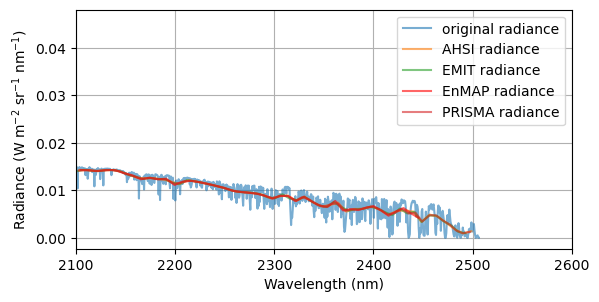

In [7]:
from matplotlib import pyplot as plt
import numpy as np

import sys

sys.path.append("C:\\Users\\RS\\VSCode\\matchedfiltermethod\\src")
from utils.satellites_data import general_functions as gf
from utils import satellites_data as sd
# Description: compare the simulated radiance with different methane concentration profiles


def draw_radiance(ax, radiance_path: str, satellite_name: str):
    channel_path = f"C:\\Users\\RS\\VSCode\\matchedfiltermethod\\src\\data\\satellite_channels\\{satellite_name}_channels.npz"

    if satellite_name == "EnMAP":
        color = "red"
        bands, convoluved_radiance = gf.get_simulated_satellite_radiance(
        radiance_path, channel_path, 2100, 2500
    )
        ax.plot(bands, convoluved_radiance, color = color,label=f"{satellite_name} radiance", alpha=0.6)
        
    #     bands, convoluved_radiance = gf.get_simulated_satellite_radiance(
    #     radiance_path, channel_path, 1900, 2500
    # )
    #     ax.plot(bands, convoluved_radiance,color = color,alpha=0.6)
        
    else:
        bands, convoluved_radiance = gf.get_simulated_satellite_radiance(
            radiance_path, channel_path, 2100, 2500
        )
        ax.plot(bands, convoluved_radiance,label=f"{satellite_name} radiance", alpha=0.6)
    
    return bands, convoluved_radiance


def radiance_compare():
    # draw the plot of the convolved radiance
    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3, rowspan=2)

    # read the simulated radiance data
    original_radiance_path = "C:\\PcModWin5\\Bin\\batch\\sensitivity_base_tape7.txt"
    
    bands,radiance = gf.read_simulated_radiance(original_radiance_path)
    ax1.plot(bands, radiance, label="original radiance", alpha=0.6)
    
    satellite_bands, convoluved_radiance = draw_radiance(ax1,original_radiance_path, "AHSI")
    satellite_bands, convoluved_radiance = draw_radiance(ax1,original_radiance_path, "EMIT")
    satellite_bands, convoluved_radiance = draw_radiance(ax1,original_radiance_path, "EnMAP")
    satellite_bands, convoluved_radiance = draw_radiance(ax1,original_radiance_path, "PRISMA")
    
    ax1.set_xlabel("Wavelength (nm)")
    ax1.set_ylabel("Radiance (W m$^{-2}$ sr$^{-1}$ nm$^{-1}$)")
    ax1.set_xlim(2100, 2600)
    ax1.legend()
    ax1.grid(True)
    plt.show()

radiance_compare()